In [3]:
# ============================
# 📊 NBFC CREDIT RISK DASHBOARD (Updated)
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Safe universal style
plt.style.use("ggplot")
sns.set_palette("viridis")

# Load data
df = pd.read_csv("final_dashboard_data.csv")

print("Data Loaded Successfully!")
df.head()


Data Loaded Successfully!


,borrower_id,age,business_type,years_in_operation,region,annual_revenue,ebitda_margin,cashflow_stability,bank_balance_avg,dti_ratio,...,interest_rate,past_delinquencies,dpd_last_6m,repayment_consistency,monthly_inflow,monthly_outflow,predicted_probability,risk_tier,cluster_id,default
0,1,39,Retail,6,North,61.85,13.28,0.59,0.10,0.11,...,15.94,0,8,0.95,3.26,10.24,0.069829,Low,0,0
1,2,33,Manufacturing,0,West,51.95,16.90,1.00,5.41,0.34,...,16.45,0,4,0.83,12.85,4.16,0.898737,High,2,1
2,3,41,Construction,0,North,93.49,13.60,0.78,3.58,0.43,...,17.68,0,10,0.63,1.34,4.15,0.056399,Low,3,0
3,4,50,Retail,3,South,76.86,3.36,0.94,2.28,0.43,...,14.98,0,0,1.00,6.51,6.26,0.065999,Low,0,0
4,5,32,Healthcare,3,East,60.85,13.34,0.94,1.54,0.37,...,10.00,0,0,0.52,1.00,9.94,0.083637,Low,0,0


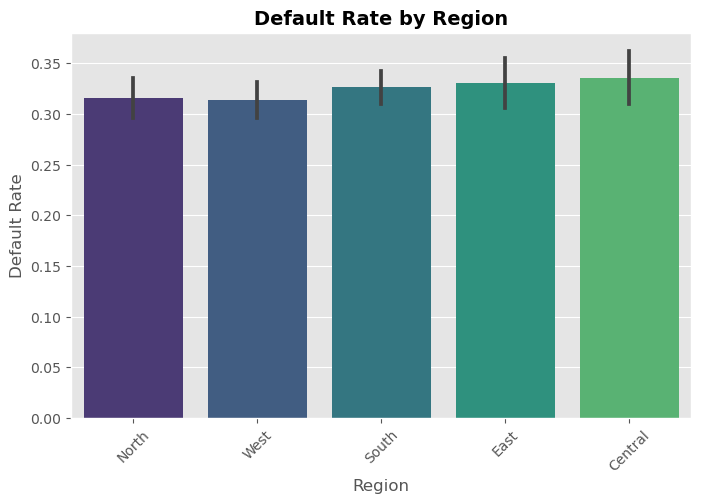

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="region", y="default")
plt.title("Default Rate by Region", fontsize=14, weight='bold')
plt.xlabel("Region")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()

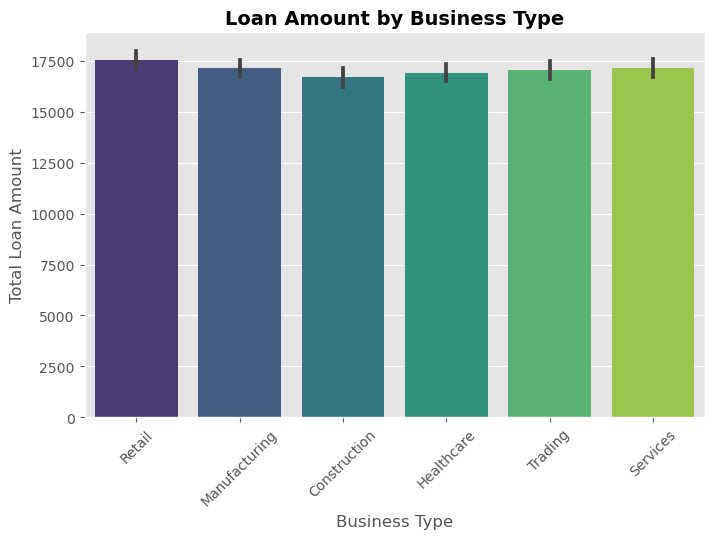

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="business_type", y="loan_amount", estimator=sum)
plt.title("Loan Amount by Business Type", fontsize=14, weight='bold')
plt.xlabel("Business Type")
plt.ylabel("Total Loan Amount")
plt.xticks(rotation=45)
plt.show()

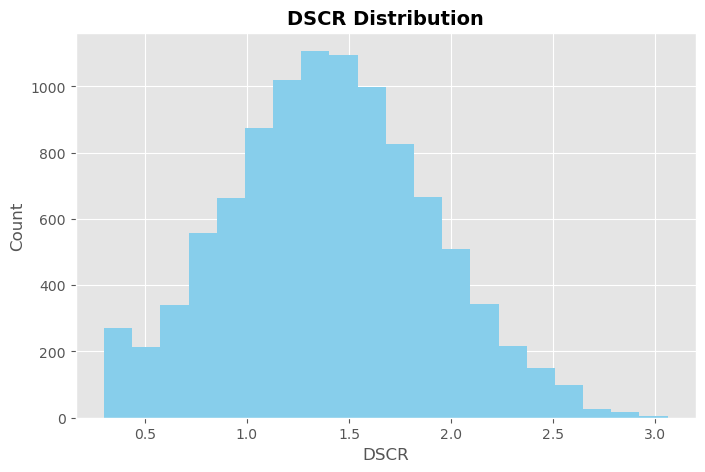

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df["dscr"], bins=20, color="skyblue")
plt.title("DSCR Distribution", fontsize=14, weight='bold')
plt.xlabel("DSCR")
plt.ylabel("Count")
plt.show()

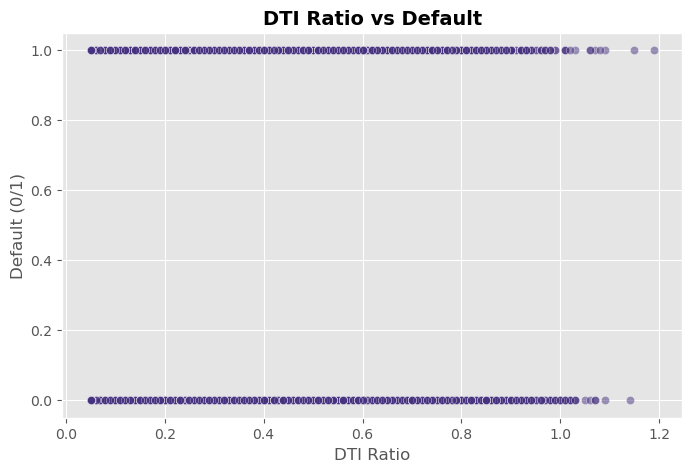

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="dti_ratio", y="default", alpha=0.5)
plt.title("DTI Ratio vs Default", fontsize=14, weight='bold')
plt.xlabel("DTI Ratio")
plt.ylabel("Default (0/1)")
plt.show()

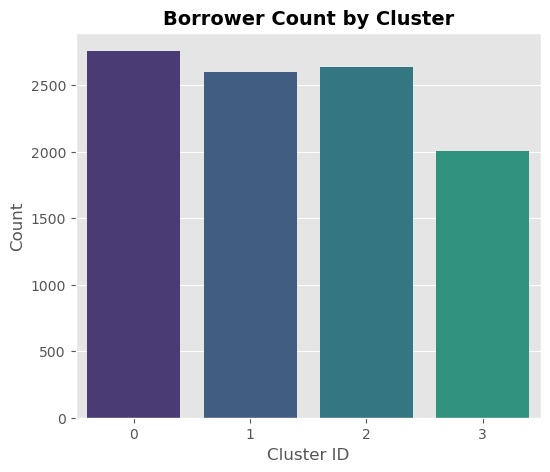

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="cluster_id")
plt.title("Borrower Count by Cluster", fontsize=14, weight='bold')
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()

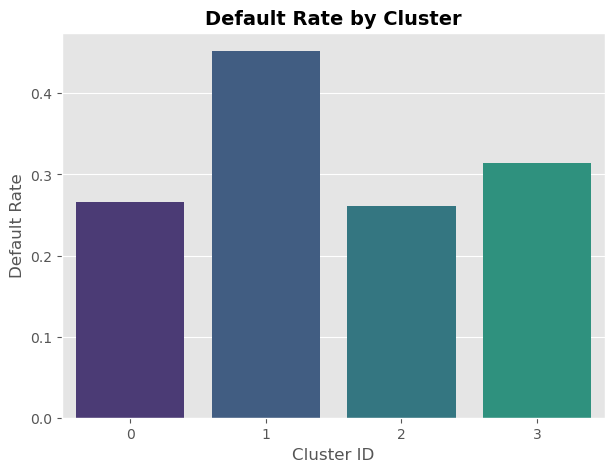

In [15]:
cluster_default = df.groupby("cluster_id")["default"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=cluster_default, x="cluster_id", y="default")
plt.title("Default Rate by Cluster", fontsize=14, weight='bold')
plt.xlabel("Cluster ID")
plt.ylabel("Default Rate")
plt.show()

In [17]:
cluster_profile = df.groupby("cluster_id")[["dti_ratio", "dscr", "cashflow_stability"]].mean().reset_index()
cluster_profile

,cluster_id,dti_ratio,dscr,cashflow_stability
0,0,0.468013,1.436425,0.734239
1,1,0.454794,1.398689,0.697474
2,2,0.427476,1.407909,0.658793
3,3,0.459726,1.363375,0.696291


C:\Users\Sriharshini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sriharshini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sriharshini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sriharshini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

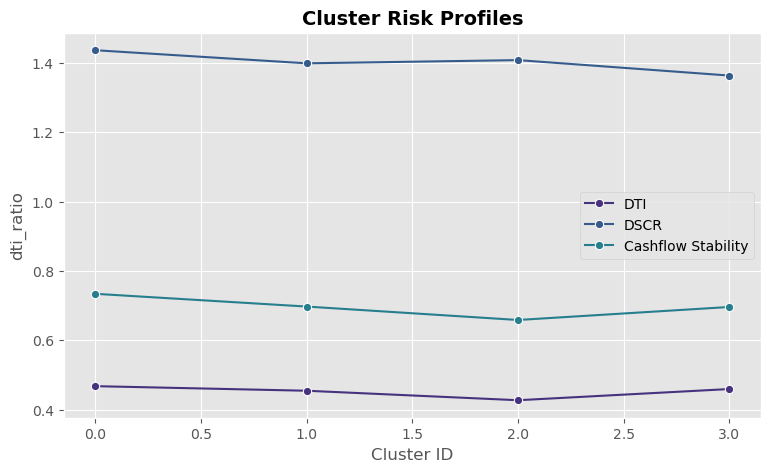

In [19]:
plt.figure(figsize=(9,5))
sns.lineplot(data=cluster_profile, x="cluster_id", y="dti_ratio", marker="o", label="DTI")
sns.lineplot(data=cluster_profile, x="cluster_id", y="dscr", marker="o", label="DSCR")
sns.lineplot(data=cluster_profile, x="cluster_id", y="cashflow_stability", marker="o", label="Cashflow Stability")
plt.title("Cluster Risk Profiles", fontsize=14, weight='bold')
plt.xlabel("Cluster ID")
plt.legend()
plt.show()

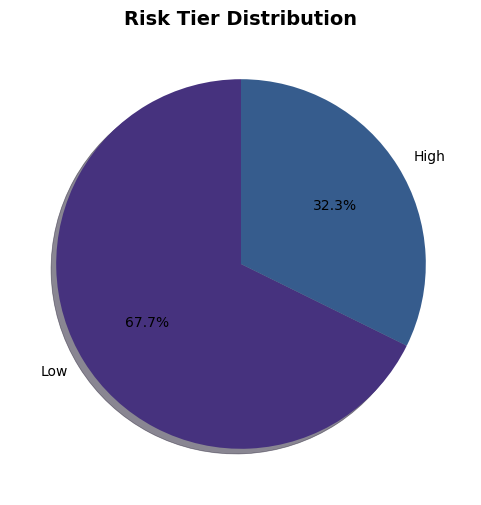

In [21]:
plt.figure(figsize=(6,6))
df["risk_tier"].value_counts().plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Risk Tier Distribution", fontsize=14, weight='bold')
plt.ylabel("")
plt.show()


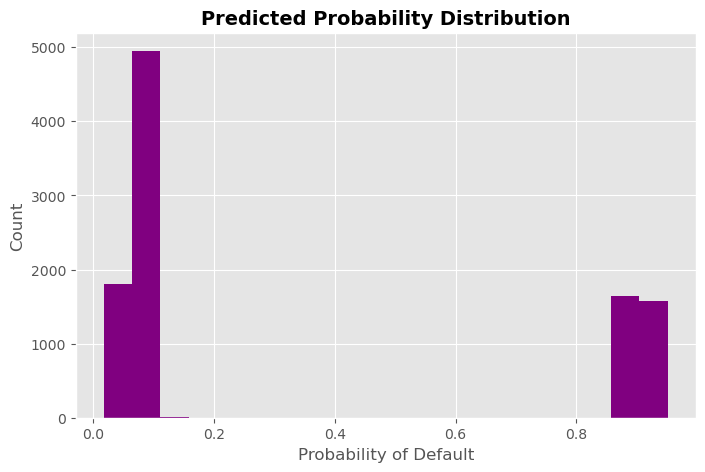

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df["predicted_probability"], bins=20, color="purple")
plt.title("Predicted Probability Distribution", fontsize=14, weight='bold')
plt.xlabel("Probability of Default")
plt.ylabel("Count")
plt.show()

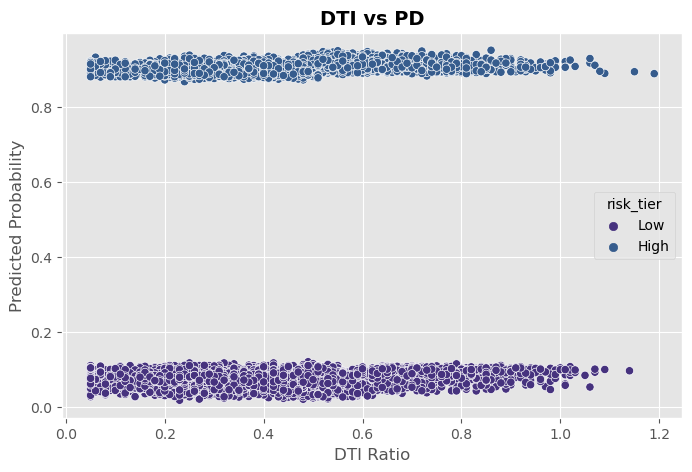

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="dti_ratio", y="predicted_probability", hue="risk_tier")
plt.title("DTI vs PD", fontsize=14, weight='bold')
plt.xlabel("DTI Ratio")
plt.ylabel("Predicted Probability")
plt.show()

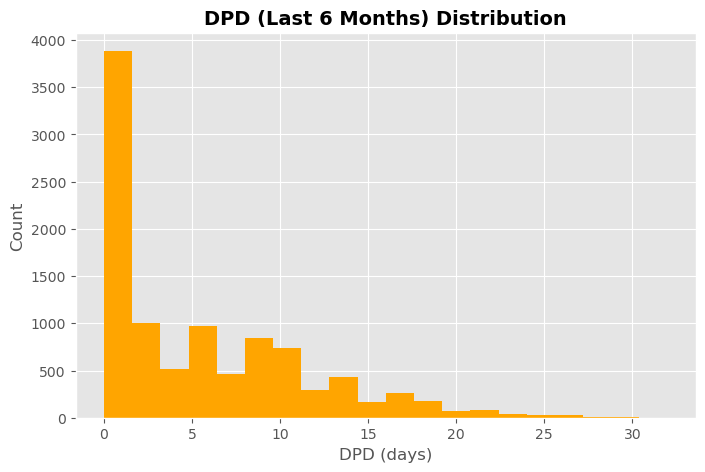

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df["dpd_last_6m"], bins=20, color="orange")
plt.title("DPD (Last 6 Months) Distribution", fontsize=14, weight='bold')
plt.xlabel("DPD (days)")
plt.ylabel("Count")
plt.show()

In [31]:
high_risk = df[df["risk_tier"] == "High"][["borrower_id", "loan_amount", "dti_ratio", "dscr", "dpd_last_6m"]]
high_risk.head(10)


,borrower_id,loan_amount,dti_ratio,dscr,dpd_last_6m
1,2,15.35,0.34,1.04,4
6,7,14.73,0.40,1.76,0
11,12,6.45,0.60,1.21,3
12,13,7.32,0.66,1.21,5
13,14,4.49,0.51,1.94,4
16,17,17.70,0.56,1.28,0
17,18,4.79,0.35,0.98,22
24,25,19.87,0.57,0.30,1
25,26,12.73,0.41,0.96,7
26,27,17.14,0.48,0.44,0


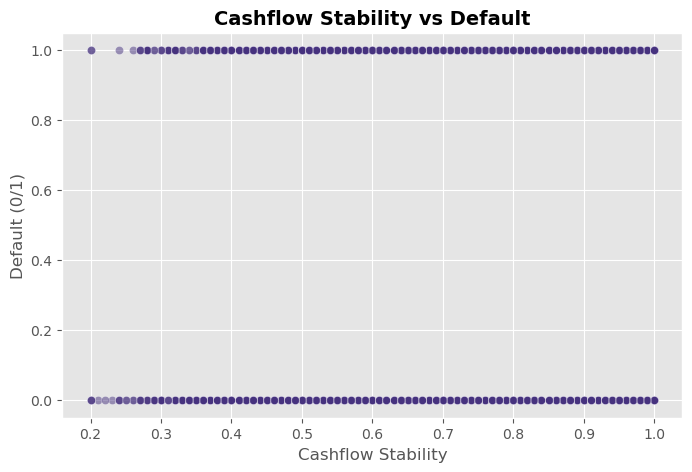

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="cashflow_stability", y="default", alpha=0.5)
plt.title("Cashflow Stability vs Default", fontsize=14, weight='bold')
plt.xlabel("Cashflow Stability")
plt.ylabel("Default (0/1)")
plt.show()

In [35]:
print("Dashboard generation completed successfully.")

Dashboard generation completed successfully.
